In [1]:
!pip install "gluonts[torch]"

You should consider upgrading via the 'e:\globalpythonvenvs\datascience\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install "gluonts[mxnet]"

  Using cached pandas-1.3.0-cp39-cp39-win_amd64.whl (10.2 MB)
Using legacy 'setup.py install' for numpy, since package 'wheel' is not installed.
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.3
    Uninstalling urllib3-2.0.3:
      Successfully uninstalled urllib3-2.0.3
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
    Running setup.py install for numpy: started
    Running setup.py install for numpy: still running...
    Running setup.py install for numpy: finished with status 'done'


ERROR: Could not install packages due to an OSError: [WinError 5] A hozzáférés megtagadva: 'E:\\GlobalPythonVenvs\\DataScience\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Check the permissions.

You should consider upgrading via the 'e:\globalpythonvenvs\datascience\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

e:\GlobalPythonVenvs\DataScience\lib\site-packages\gluonts\json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [28]:
# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True
)
dataset = PandasDataset(df, target="#Passengers")

In [29]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [35]:

# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-48)
test_data = test_gen.generate_instances(prediction_length=12, windows=4)

In [36]:

# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
e:\GlobalPythonVenvs\DataScience\lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(

  | Name  | Type        | Params | In sizes | Out sizes   
----------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | ?        | [1, 100, 12]
----------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)


Epoch 0: : 50it [00:03, 12.93it/s, v_num=2, train_loss=5.730]

Epoch 0, global step 50: 'train_loss' reached 5.72716 (best 5.72716), saving model to 'e:\\PassengerTrafficForecasting\\PassengerTrafficForecasting\\lightning_logs\\version_2\\checkpoints\\epoch=0-step=50.ckpt' as top 1


Epoch 1: : 50it [00:02, 23.19it/s, v_num=2, train_loss=4.670]

Epoch 1, global step 100: 'train_loss' reached 4.66865 (best 4.66865), saving model to 'e:\\PassengerTrafficForecasting\\PassengerTrafficForecasting\\lightning_logs\\version_2\\checkpoints\\epoch=1-step=100.ckpt' as top 1


Epoch 2: : 50it [00:02, 22.00it/s, v_num=2, train_loss=4.420]

Epoch 2, global step 150: 'train_loss' reached 4.41604 (best 4.41604), saving model to 'e:\\PassengerTrafficForecasting\\PassengerTrafficForecasting\\lightning_logs\\version_2\\checkpoints\\epoch=2-step=150.ckpt' as top 1


Epoch 3: : 50it [00:02, 22.21it/s, v_num=2, train_loss=4.210]

Epoch 3, global step 200: 'train_loss' reached 4.20936 (best 4.20936), saving model to 'e:\\PassengerTrafficForecasting\\PassengerTrafficForecasting\\lightning_logs\\version_2\\checkpoints\\epoch=3-step=200.ckpt' as top 1


Epoch 4: : 50it [00:02, 18.58it/s, v_num=2, train_loss=4.120]

Epoch 4, global step 250: 'train_loss' reached 4.11659 (best 4.11659), saving model to 'e:\\PassengerTrafficForecasting\\PassengerTrafficForecasting\\lightning_logs\\version_2\\checkpoints\\epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: : 50it [00:02, 18.44it/s, v_num=2, train_loss=4.120]


In [37]:
forecasts = list(model.predict(test_data.input))


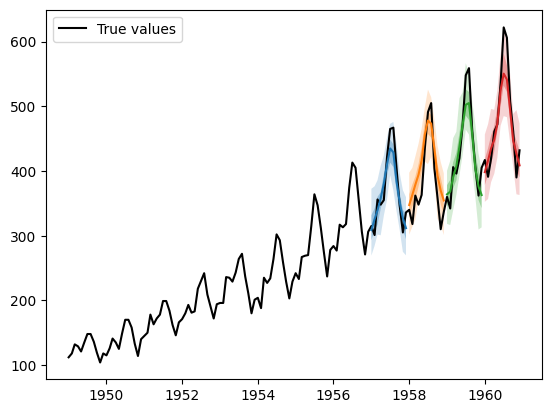

In [38]:
# Plot predictions
plt.plot(df, color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left")

In [82]:
path = r"C:\Users\licht\Downloads\archive (1)\traffic.csv"

In [83]:

df = pd.read_csv (path, index_col=0, parse_dates=True)

In [84]:
#df = df.drop("ID", axis=1)

In [85]:
df.index = pd.to_datetime(df.index, unit="ms")

In [86]:
df

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
...,...,...,...
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214


<AxesSubplot:>

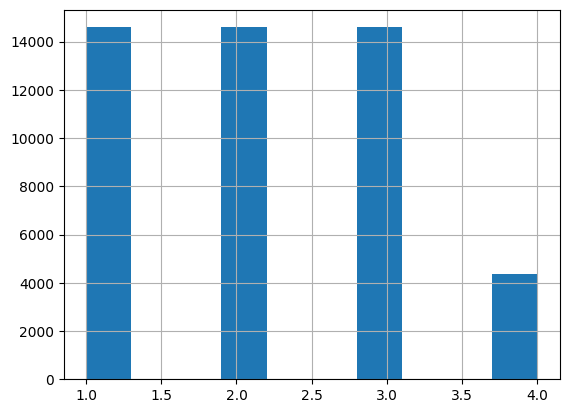

In [144]:
df.Junction.hist()

In [94]:
dataset = PandasDataset.from_long_dataframe(df, target="Vehicles", item_id="Junction")

In [99]:
training_data, test_gen = split(dataset, offset=-24*30*4)
test_data = test_gen.generate_instances(prediction_length=24*30, windows=4)

In [96]:
dataset

PandasDataset<size=4, freq=H, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>

In [97]:
model = DeepAREstimator(
    prediction_length=24*30, freq="H", trainer_kwargs={"max_epochs": 5}
).train(training_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes | Out sizes    
-----------------------------------------------------------------
0 | model | DeepARModel | 27.6 K | ?        | [1, 100, 720]
-----------------------------------------------------------------
27.6 K    Trainable params
0         Non-trainable params
27.6 K    Total params
0.111     Total estimated model params size (MB)


Epoch 0: : 50it [00:39,  1.27it/s, v_num=6, train_loss=3.490]

Epoch 0, global step 50: 'train_loss' reached 3.49073 (best 3.49073), saving model to 'e:\\PassengerTrafficForecasting\\PassengerTrafficForecasting\\lightning_logs\\version_6\\checkpoints\\epoch=0-step=50.ckpt' as top 1


Epoch 1: : 50it [00:30,  1.65it/s, v_num=6, train_loss=2.810]

Epoch 1, global step 100: 'train_loss' reached 2.81098 (best 2.81098), saving model to 'e:\\PassengerTrafficForecasting\\PassengerTrafficForecasting\\lightning_logs\\version_6\\checkpoints\\epoch=1-step=100.ckpt' as top 1


Epoch 2: : 50it [00:28,  1.75it/s, v_num=6, train_loss=2.610]

Epoch 2, global step 150: 'train_loss' reached 2.61351 (best 2.61351), saving model to 'e:\\PassengerTrafficForecasting\\PassengerTrafficForecasting\\lightning_logs\\version_6\\checkpoints\\epoch=2-step=150.ckpt' as top 1


Epoch 3: : 50it [00:29,  1.70it/s, v_num=6, train_loss=2.510]

Epoch 3, global step 200: 'train_loss' reached 2.50647 (best 2.50647), saving model to 'e:\\PassengerTrafficForecasting\\PassengerTrafficForecasting\\lightning_logs\\version_6\\checkpoints\\epoch=3-step=200.ckpt' as top 1


Epoch 4: : 50it [00:29,  1.69it/s, v_num=6, train_loss=2.470]

Epoch 4, global step 250: 'train_loss' reached 2.46872 (best 2.46872), saving model to 'e:\\PassengerTrafficForecasting\\PassengerTrafficForecasting\\lightning_logs\\version_6\\checkpoints\\epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: : 50it [00:29,  1.69it/s, v_num=6, train_loss=2.470]


In [100]:
forecasts = list(model.predict(test_data.input))


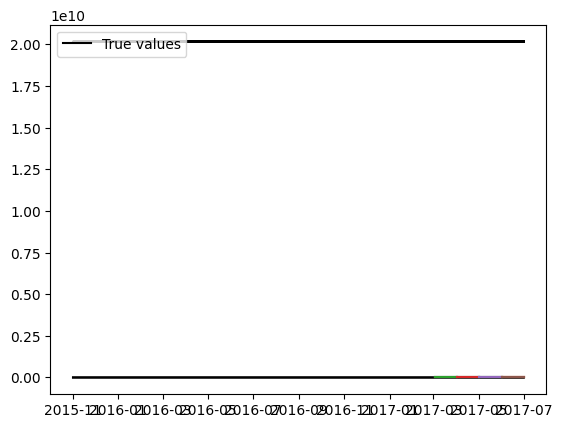

In [101]:
# Plot predictions
plt.plot(df, color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left")

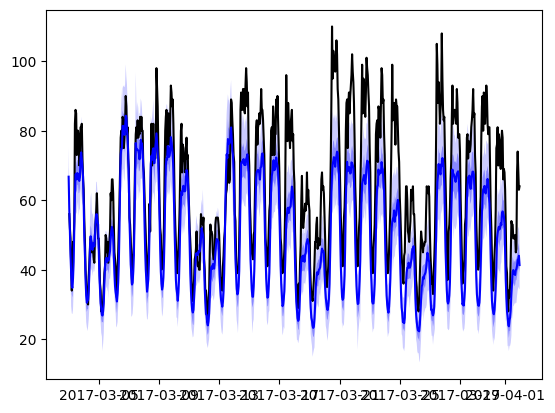

In [163]:
plt.plot(df[(df["Junction"] == 1) & (df.index > pd.to_datetime("2017-03-03")) & (df.index < pd.to_datetime("2017-04-02"))]["Vehicles"], color="black")
for forecast in forecasts[:1] :
    forecast.plot(color="blue", intervals=(0.5, 0.9))